In [1]:
!pip install -Uq transformers
!pip install -Uq sentencepiece
!pip install -Uq sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 8.2 MB/s eta 0:00:00


****

***

In [2]:
from transformers import pipeline
import pandas as pd

## Text Classification

In [3]:
classifier = pipeline(task="text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
text = "I love Machine Learning and AI"

output = classifier(text)

pd.DataFrame(output)

,label,score
0,POSITIVE,0.999501


In [5]:
output

[{'label': 'POSITIVE', 'score': 0.9995005130767822}]

***

In [6]:
classifier = pipeline(task = "text-classification", model = "SamLowe/roberta-base-go_emotions")

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
text = "I wish, I have that car too."
pd.DataFrame(classifier(text))

,label,score
0,desire,0.833558


***

## NER

In [8]:
from transformers import pipeline

In [11]:
ner = pipeline(task = "ner", aggregation_strategy = "simple")

text = "My Name is Suraj Yadav. I work for Absis Pvt. Lt."

output = ner(text)

pd.DataFrame(output)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

,entity_group,score,word,start,end
0,PER,0.910949,Suraj Yadav,11,22
1,ORG,0.970623,Absis P,35,42


In [12]:
ner = pipeline(task = "ner", aggregation_strategy = "simple", model="ml6team/keyphrase-extraction-kbir-inspec")

text = "My Name is Suraj Yadav. I work for Absis Pvt. Lt."

output = ner(text)

pd.DataFrame(output)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,entity_group,score,word,start,end
0,KEY,0.999971,Absis,35,40


***

## Q/A

In [15]:
from transformers import pipeline

In [16]:
qa = pipeline(task = "question-answering")

text = "My Name is Suraj Yadav. I work for Absis Pvt. Lt."

output = qa(question = "Where do I work?", context = text)

output

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'score': 0.6824191808700562,
 'start': 35,
 'end': 48,
 'answer': 'Absis Pvt. Lt'}

In [18]:
pd.DataFrame([output])

,score,start,end,answer
0,0.682419,35,48,Absis Pvt. Lt


***

## Summarization

In [19]:
summarizer = pipeline(task = "summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
text = """
The Lost Key

Anya was a curious child. One sunny afternoon, she wandered into the old,
overgrown garden behind her house. A peculiar glint caught her eye.
It was a small, tarnished key, lying half-buried in the soft earth.
Intrigued, she picked it up and tried it on the various locks around the garden.
None seemed to fit.

Disappointed, Anya tucked the key into her pocket and continued exploring.
As she wandered further, she stumbled upon a hidden door she'd never noticed before.
With a hopeful heart, she tried the key. To her amazement, it slid into the lock with a satisfying click.
The door creaked open, revealing a secret, sunlit room filled with forgotten treasures.
"""

In [21]:
output = summarizer(text)
output

[{'summary_text': ' Anya was a curious child when she stumbled upon a hidden door in the garden behind her house . The door creaked open, revealing a secret, sunlit room filled with forgotten treasures . Anya tucked the key into her pocket and continued exploring the garden . The key slid into the lock with a satisfying click .'}]

***

## Text Generation

In [37]:
from transformers import pipeline
from transformers import set_seed

In [38]:
set_seed(0)

In [24]:
text_generator = pipeline(task = "text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [45]:
output = text_generator("I had to go there", max_length=500)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [46]:
output

[{'generated_text': 'I had to go there. We\'re about to start the season in Dallas and we\'ll be able to talk about it tomorrow night."\n\nIt is hard to imagine that this is the beginning of a new season. This is going to be a time when New Orleans will continue to struggle, not simply because we\'ve been given their best shots at their starting line-up and most importantly to the game itself, and the injuries that have plagued them for four years. The team now faces the real threat of two bad games.\n\nOne would be a game against the Saints that is more about defense. That is something most people never think. This one is going to be nothing special, but it will be a step up from what the Saints have been doing.\n\nThe Cowboys need to be better. They will have to beat them to the finish line, but they need to not be afraid to do so. The Cowboys have been one of the NFL\'s worst offenses in the past two seasons, and they don\'t have a chance.\n\nSo we can\'t let the Redskins get away w

In [47]:
print(output[0]['generated_text'])

I had to go there. We're about to start the season in Dallas and we'll be able to talk about it tomorrow night."

It is hard to imagine that this is the beginning of a new season. This is going to be a time when New Orleans will continue to struggle, not simply because we've been given their best shots at their starting line-up and most importantly to the game itself, and the injuries that have plagued them for four years. The team now faces the real threat of two bad games.

One would be a game against the Saints that is more about defense. That is something most people never think. This one is going to be nothing special, but it will be a step up from what the Saints have been doing.

The Cowboys need to be better. They will have to beat them to the finish line, but they need to not be afraid to do so. The Cowboys have been one of the NFL's worst offenses in the past two seasons, and they don't have a chance.

So we can't let the Redskins get away with it. That's the biggest part.

W

In [48]:
text_generator = pipeline(task = "text-generation", model = "gpt2-large")
output = text_generator("I had to go there", max_length=300)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [49]:
output

[{'generated_text': 'I had to go there. I was in the middle of doing it, but I knew that if I left, there would be no going back."\n\nHe was adamant. He knew what was right to do, and I had to, too. There was no easy option, no way to go back.\n\nLinda and I met with the lawyer and asked the question: Do you believe I did something wrong?\n\n"No," he said. "The truth of the matter is the same as it has always been."\n\n"Why did you lie, then? Because the truth is the same as it is, and I said yes? That\'s what you did.\n\n"After everything that has happened to me and to this company, I have no reason to lie, but why did you lie?" he continued, voice rising. "You had to lie, otherwise everything with you -- everything -- would be different. The truth is the same today."\n\nHe pointed to his hands -- the nails he had been using to nail himself at the office and on the driveway for several years -- and he said: "If you\'re telling me the truth, the only way to save you, Linda, is for me t

***

## Translation

In [50]:
translator = pipeline(task = "translation_en_to_de")

output = translator("I had to go there", max_length=300)

output

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'translation_text': 'Ich musste dorthin fahren'}]

In [59]:
# Translation from English to Hindi
translator = pipeline(model = "Helsinki-NLP/opus-mt-en-hi")

output = translator("I had to go there", max_length=300)

output

[{'translation_text': 'मुझे वहाँ जाना था'}]

In [60]:
output = translator("I have to go there, otherwise she would kill her.", max_length=300)

output

[{'translation_text': 'मुझे वहाँ जाना है, अन्यथा वह उसे मार डालेगा.'}]

***

## Image classification

In [62]:
from PIL import Image
import requests
from transformers import pipeline

In [67]:
url = "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL697473_RGB_PNG_namnse.jpg"

In [68]:
image = Image.open(requests.get(url, stream=True).raw)

In [69]:
image

Output hidden; open in https://colab.research.google.com to view.

In [70]:
image_classifier = pipeline(task = "image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [71]:
output = image_classifier(image)

In [72]:
output

[{'label': 'Egyptian cat', 'score': 0.9214931130409241},
 {'label': 'tabby, tabby cat', 'score': 0.058183424174785614},
 {'label': 'tiger cat', 'score': 0.012602887116372585},
 {'label': 'lynx, catamount', 'score': 0.00371585413813591},
 {'label': 'Siamese cat, Siamese', 'score': 0.00039997894782572985}]

In [73]:
pd.DataFrame(output)

,label,score
0,Egyptian cat,0.921493
1,"tabby, tabby cat",0.058183
2,tiger cat,0.012603
3,"lynx, catamount",0.003716
4,"Siamese cat, Siamese",0.000400


In [75]:
url = "https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

image = Image.open(requests.get(url, stream=True).raw)
classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")

outputs = classifier(image)
pd.DataFrame(outputs)


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


,label,score
0,30-39,0.554573
1,20-29,0.392186
2,40-49,0.050555
3,10-19,0.001498
4,50-59,0.000943


In [78]:
url = "https://st3.depositphotos.com/3917667/19230/i/450/depositphotos_192302140-stock-photo-the-senior-emotional-angry-man.jpg"

image = Image.open(requests.get(url, stream=True).raw)
classifier = pipeline("image-classification", model="Rajaram1996/FacialEmoRecog")

outputs = classifier(image)
outputs



[{'label': 'disgust', 'score': 0.2047712206840515},
 {'label': 'surprise', 'score': 0.18153521418571472},
 {'label': 'happy', 'score': 0.15962877869606018},
 {'label': 'fear', 'score': 0.13467444479465485},
 {'label': 'contempt', 'score': 0.09756508469581604}]

In [79]:
pd.DataFrame(outputs)

,label,score
0,disgust,0.204771
1,surprise,0.181535
2,happy,0.159629
3,fear,0.134674
4,contempt,0.097565


***

## Image Segmentation

In [80]:
url = "https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

image = Image.open(requests.get(url, stream=True).raw)

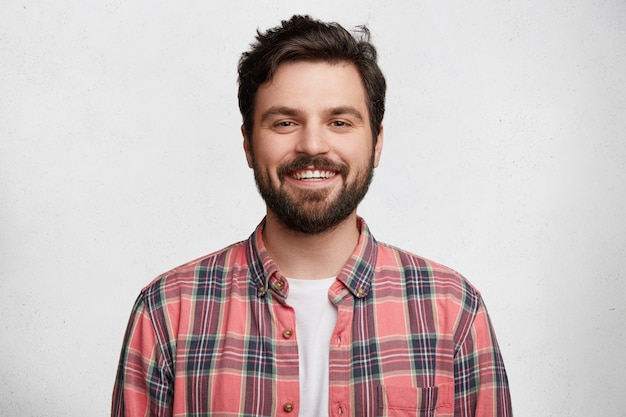

In [84]:
image

In [81]:
segmenter = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")
outputs = segmenter(image)

outputs

config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=626x417>}]

In [82]:
pd.DataFrame(outputs)

,score,label,mask
0,None,Background,<PIL.Image.Image image mode=L size=626x417 at ...
1,None,Hair,<PIL.Image.Image image mode=L size=626x417 at ...
2,None,Upper-clothes,<PIL.Image.Image image mode=L size=626x417 at ...
3,None,Face,<PIL.Image.Image image mode=L size=626x417 at ...


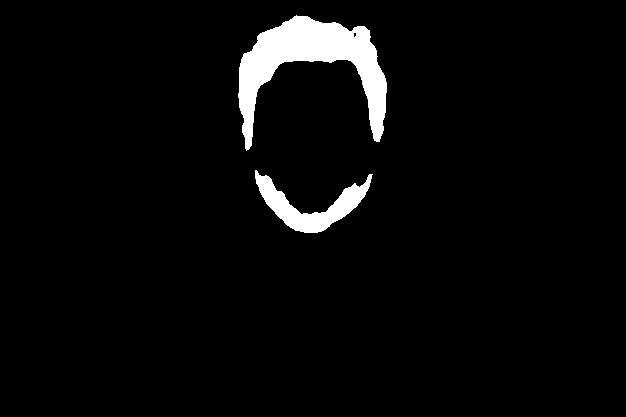

In [85]:
  outputs[1]['mask']

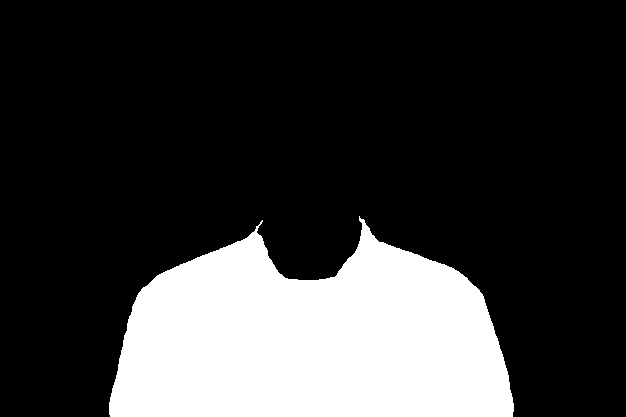

In [86]:
outputs[2]['mask']

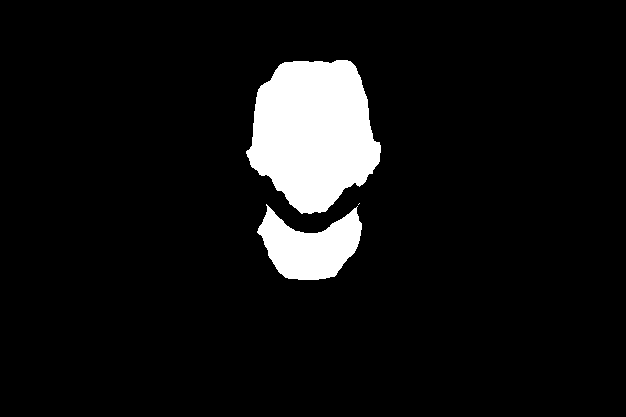

In [87]:
  outputs[3]['mask']

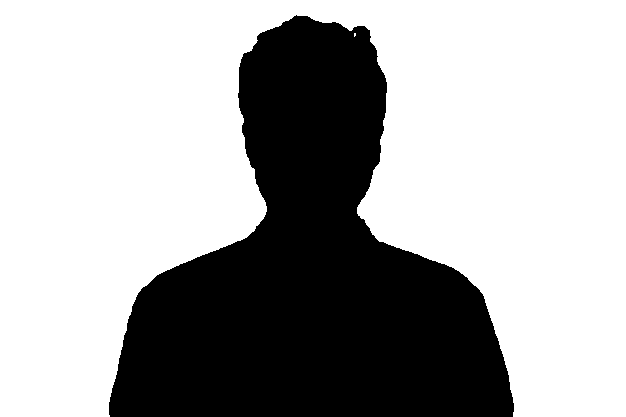

In [88]:
outputs[0]['mask']

***

## Text to Speech

In [89]:
import transformers
transformers.__version__

'4.44.2'

In [90]:
import soundfile as sf

In [91]:
text="""Sam Altman on Wednesday returned to OpenAI as the chief executive officer (CEO) and sacked the Board that had fired him last week.
However, the only remaining member in the Board team is Adam D'Angelo, CEO of Quora.
Ex-Salesforce co-CEO Bret Taylor and former US Treasury Secretary and president of Harvard University, Larry Summers will join D'Angelo."""

In [92]:
synth = pipeline("text-to-speech")

No model was supplied, defaulted to suno/bark-small and revision 645cfba (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
speech=synth(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
speech

In [ ]:
sf.write("speech.wav", speech["audio"].T, samplerate=speech['sampling_rate'])

In [ ]:
***

## Text to Music Generation

In [ ]:
synth = pipeline("text-to-audio", "facebook/musicgen-small")
text = "a chill song with influences from lofi, chillstep and downtempo"

music = synth(text, forward_params={"do_sample":True})


In [ ]:
# sf.write("music.wav",music["audio"].T, samplerate=music['sampling_rate'])
import scipy
scipy.io.wavfile.write("music.wav", rate=music["sampling_rate"], data=music['audio'])